[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Image Search in Large Datasets

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/image-search.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/image-search.ipynb)

With the ever increasing data generated every day, it's important to have efficient ways to search through large image dataset to find the ones you need.

If you only have a CPU only machine and want to search through a large dataset using image as queries, this tutorial is for you.

We will walk you through how to use fastdup to search through thousands of images and find similar looking images to your query image.

## Installation

In [ ]:
!pip install fastdup -Uq

In [1]:
import fastdup
fastdup.__version__

/home/dnth/anaconda3/envs/fastdup2021/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


'2.0.21'

## Shoppee Product Match Dataset

In this notebook we will use the a dataset from [Shopee Product Match Kaggle Competition](https://www.kaggle.com/competitions/shopee-product-matching/data). In this competition, participants must determine if two products are the same by their images.

Head to Kaggle and download the dataset into your local directory. You should have a folder named `shopee-product-matching` in your current working directory.

With the dataset downloaded, let's randomly pick a few images and preview them.

In [2]:
sample_images=!find shopee-product-matching/ -name '*.jpg'
ret = fastdup.generate_sprite_image(sample_images, 55, ".")[0]

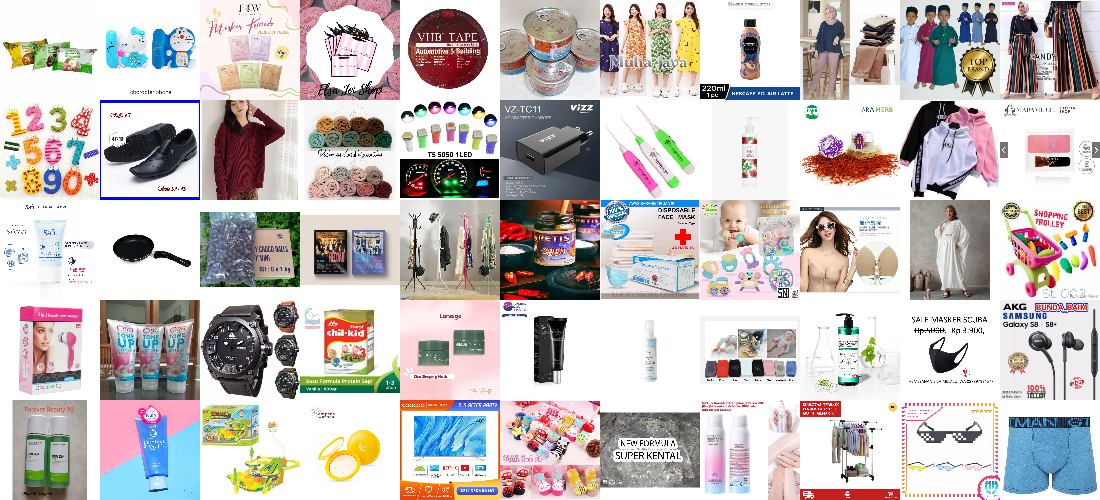

In [3]:
from IPython.display import Image
Image(filename=ret)

## Run fastdup

Point `input_dir` to the location you store the images.

In [4]:
input_dir = "./shopee-product-matching"
work_dir = "./my-fastdup-workdir"

fastdup.run(input_dir, work_dir)

fastdup By Visual Layer, Inc. 2024. All rights reserved.


0

## Restart Runtime

Once the run is complete you can terminate the session and use the generated arfifacts to run an image search.

Let's restart the kernel to simulate a different session.

In [5]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Initialize Search Parameters

To start searching we must first initialize the search parameters.

The first positional argument is `k` - The number of nearest neighbors to search for. 

In this case we want to search for 10 nearest neighbor. Feel free to experiment with your own number of `k`.

In [2]:
import fastdup

work_dir = "./my-fastdup-workdir"
fastdup.init_search(10, work_dir=work_dir)

2024-06-12 22:04:36 [INFO] 38) Finished load_index() NN model, num_images 32415
2024-06-12 22:04:36 [INFO] Read nnf index file from ./my-fastdup-workdir/nnf.index
2024-06-12 22:04:36 [INFO] Read NNF index with 32415 images
init_search() initialized OK.


0

## Search with a Query Image

Let's use our own image and find out if there are matches in the shopee dataset.

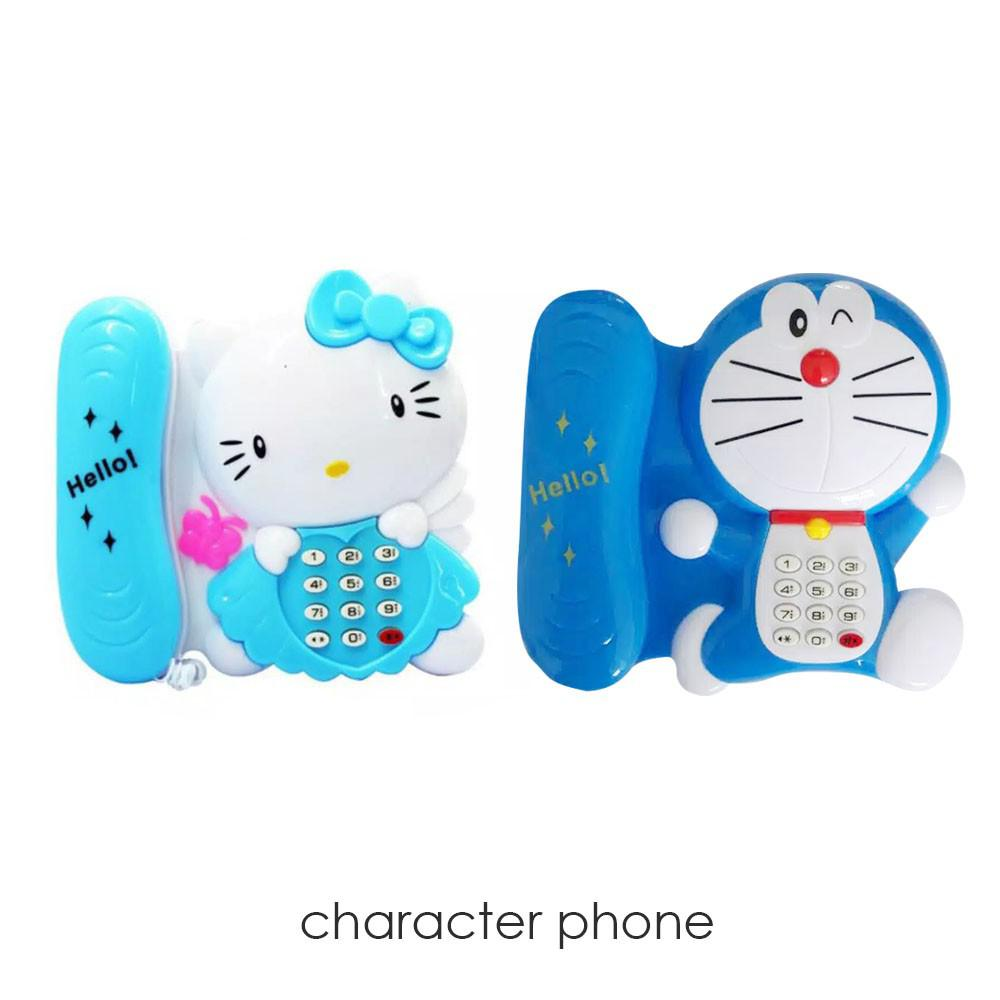

In [4]:
from IPython.display import Image
Image(filename="shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg")

Specify the query image filename and search for similar images in the images directory.

In [5]:
df = fastdup.search("shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg")

0 False
2024-06-12 22:05:21 [INFO] Total time took 63 ms
2024-06-12 22:05:21 [INFO] Found a total of 1 fully identical images (d>0.990), which are 0.00 % of total graph edges
2024-06-12 22:05:21 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 % of total graph edges
2024-06-12 22:05:21 [INFO] Found a total of 10 above threshold images (d>0.700), which are 0.00 % of total graph edges
2024-06-12 22:05:21 [INFO] Found a total of 1 outlier images         (d<0.000), which are 0.00 % of total graph edges
2024-06-12 22:05:21 [INFO] Min similarity found 0.822 max similarity 1.000


Inspect the search result.

The `distance` value indicate how similar is your query image to the other image. 

A `distance` of `1.0` indicates the images are exact duplicates. The lower the value, the less similar the images are.

In [6]:
df

,from,to,distance
0,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,1.000000
1,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/b1b0ef712ae90ecc8d1ec7bc5d11485a.jpg,0.842375
2,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/182ef6021d6b2118fb9915156cff50e6.jpg,0.841552
3,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/5235cbbdfd70272503647694730424c4.jpg,0.836889
4,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/4cd0ef616259eac109212b2f2e5f7136.jpg,0.830368
5,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/4851da5e4b570ab7147566c85b3fabc2.jpg,0.829968
6,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/c29d3d0821e9e3b0188c005fd95bf424.jpg,0.828526
7,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/086b2dcda1059ba3fd0365a42277b743.jpg,0.828210
8,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/60abf69848da6bc126f31c880a6372ca.jpg,0.825624
9,shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg,shopee-product-matching/train_images/0ae01a272a94a019759bc2a3b4813ee2.jpg,0.822049


You can repeat the search as many times as you wish as long as the model is loaded in memory.

Let's try to search using another query image.

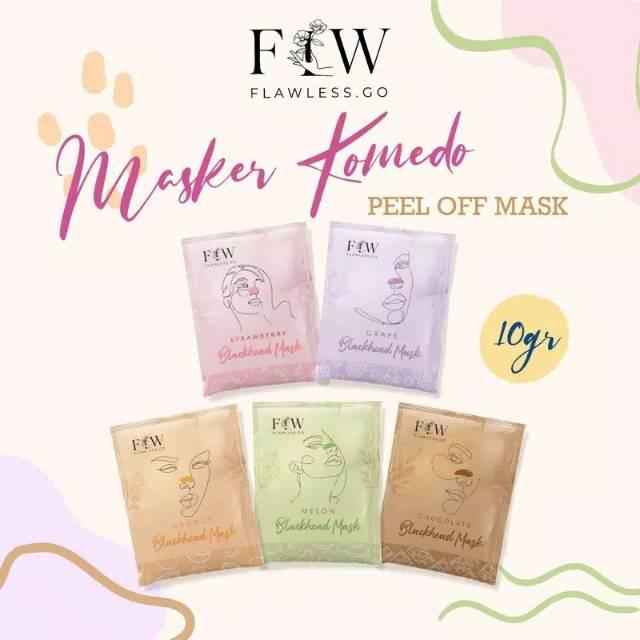

In [7]:
Image(filename="shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg")

In [8]:
df2 = fastdup.search("shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg")

0 False
2024-06-12 22:05:47 [INFO] Total time took 20 ms
2024-06-12 22:05:47 [INFO] Found a total of 1 fully identical images (d>0.990), which are 0.00 % of total graph edges
2024-06-12 22:05:47 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 % of total graph edges
2024-06-12 22:05:47 [INFO] Found a total of 10 above threshold images (d>0.700), which are 0.00 % of total graph edges
2024-06-12 22:05:47 [INFO] Found a total of 1 outlier images         (d<0.000), which are 0.00 % of total graph edges
2024-06-12 22:05:47 [INFO] Min similarity found 0.751 max similarity 0.999


In [9]:
df2

,from,to,distance
0,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,0.998664
1,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/0728167ad63d954828ead460c34a18f1.jpg,0.787696
2,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/4babdac92bac8ed1b489e08f4b753772.jpg,0.786759
3,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/93171da404992e3dae9607f4fcdab48c.jpg,0.786458
4,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/91307a90a0307d3766feb3df475b9e61.jpg,0.786357
5,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/db87686fb0a0f181074478dc688146cd.jpg,0.770760
6,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/3df1c072d8ff94fe0f6309be4ba8b6e7.jpg,0.767405
7,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/7b298b7675c5e3e313d2bd0c8ea9a9f9.jpg,0.767389
8,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/2165534b91330cf04b567ef8d51ba17a.jpg,0.757656
9,shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg,shopee-product-matching/train_images/46d63b8d474480dae4f519c00c3119d0.jpg,0.751443


## Visualize Results

This step is optional. fastdup provides a convenient way to visualize your search results for duplicate and similar looking images.

In [10]:
fastdup.create_duplicates_gallery(df, work_dir, input_dir="./shopee-product-matching")

Generating gallery:   0%|          | 0/10 [00:00<?, ?it/s]

Stored similarity visual view in  ./my-fastdup-workdir/duplicates.html


0


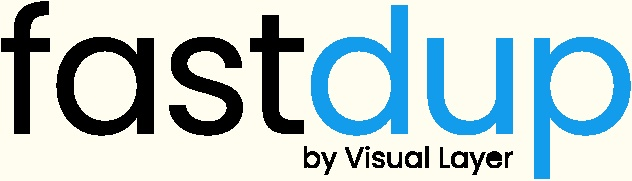
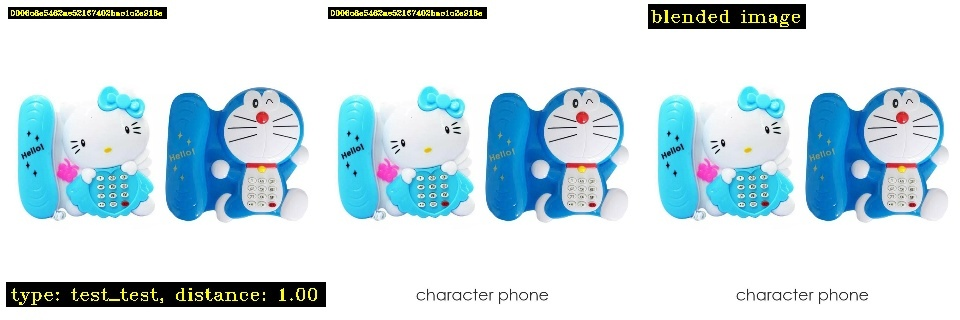
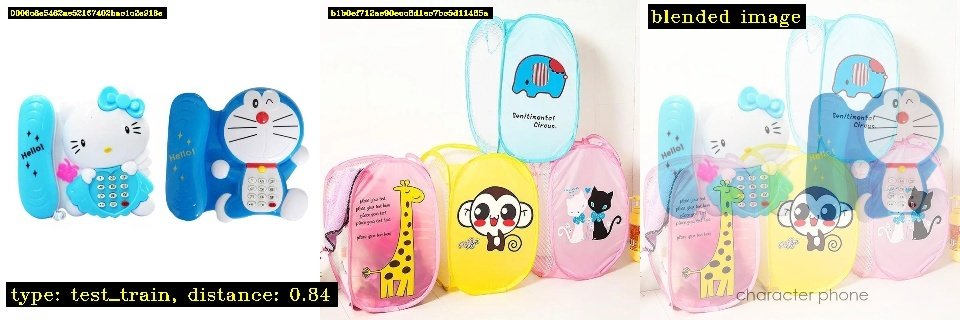
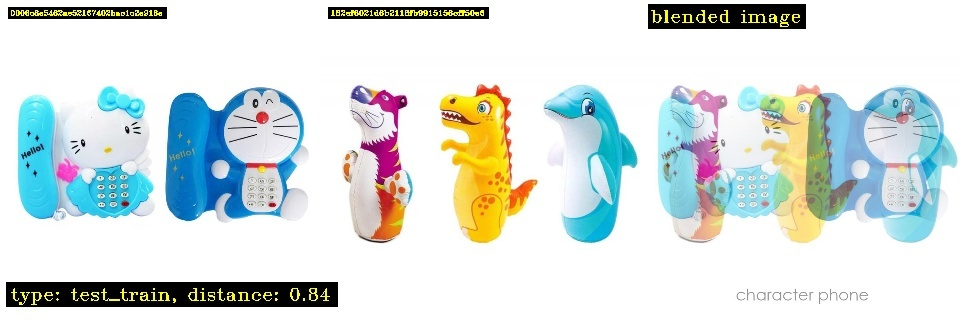
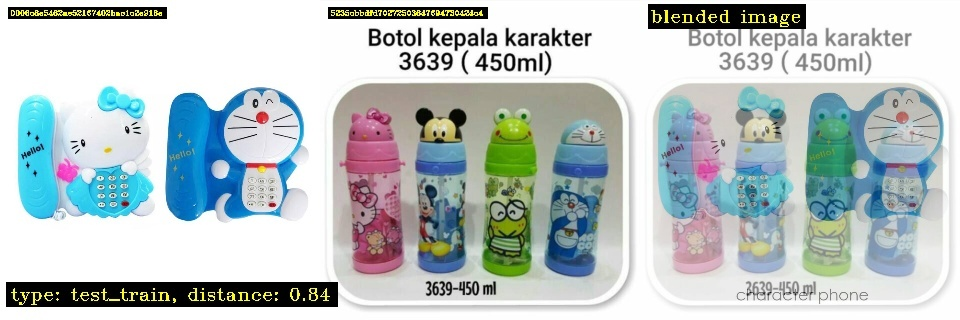
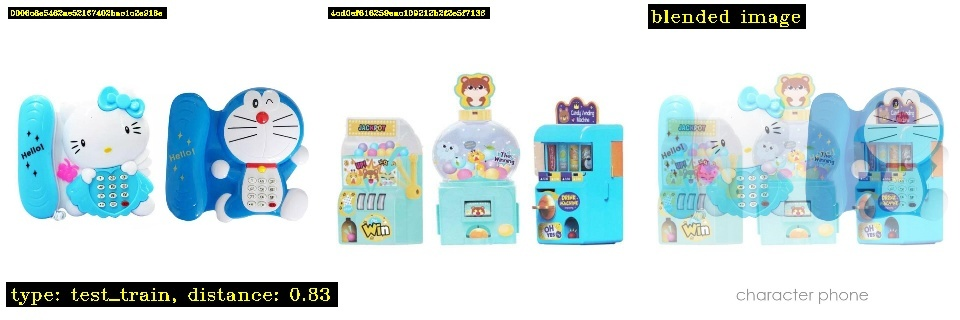
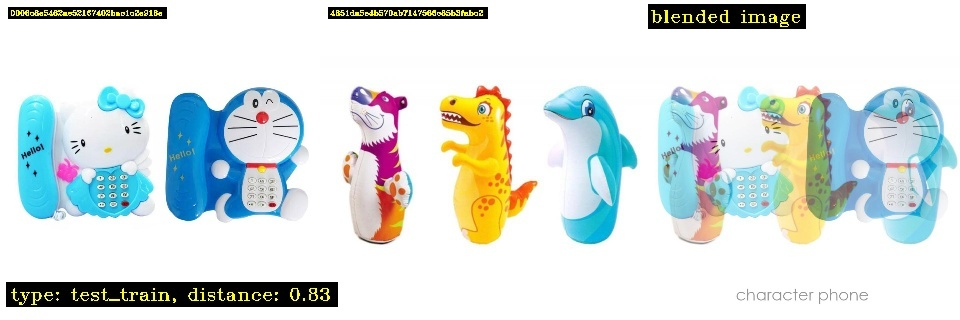
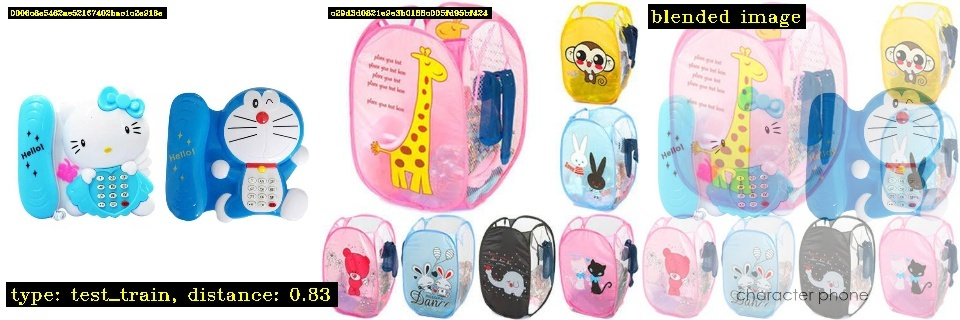
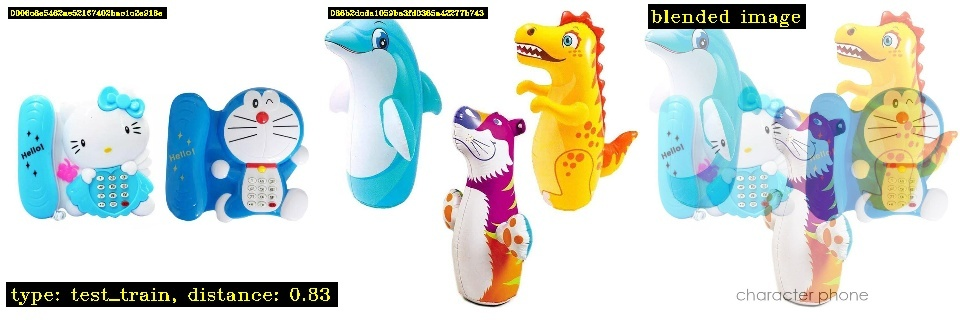
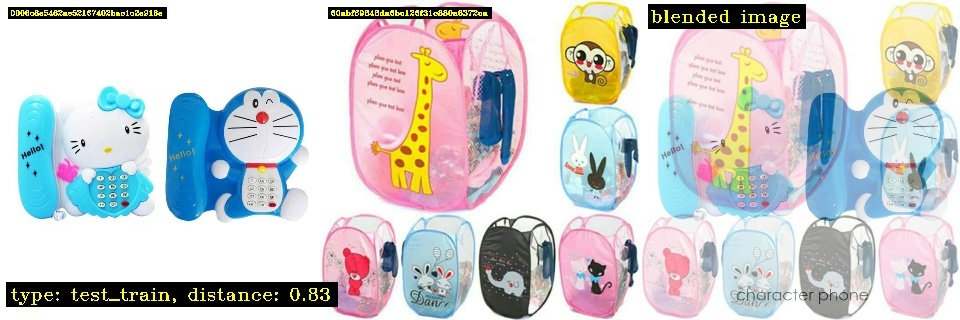
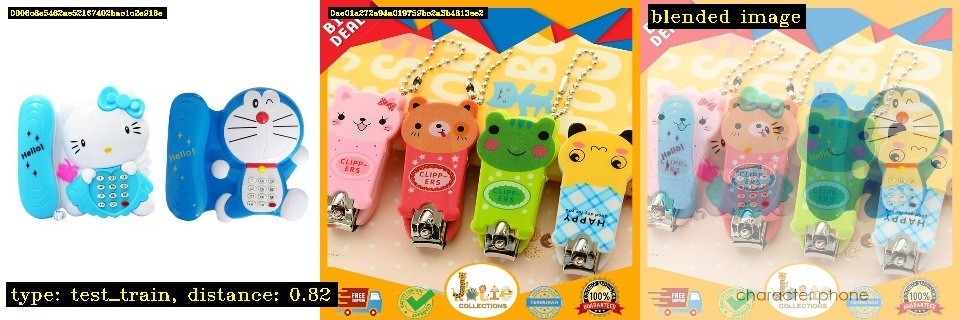

In [12]:
from IPython.display import HTML
HTML(filename="./my-fastdup-workdir/duplicates.html")

Generating gallery:   0%|          | 0/1 [00:00<?, ?it/s]

Stored similar images visual view in  ./my-fastdup-workdir/similarity.html



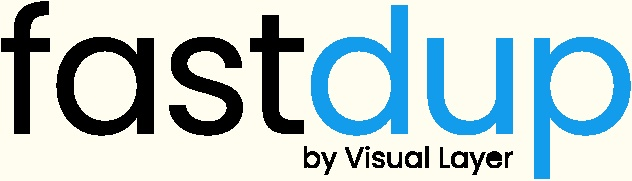
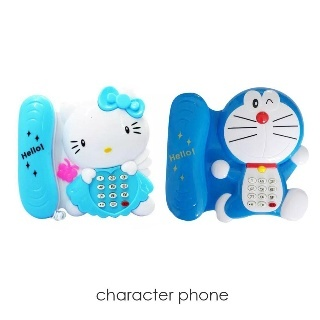
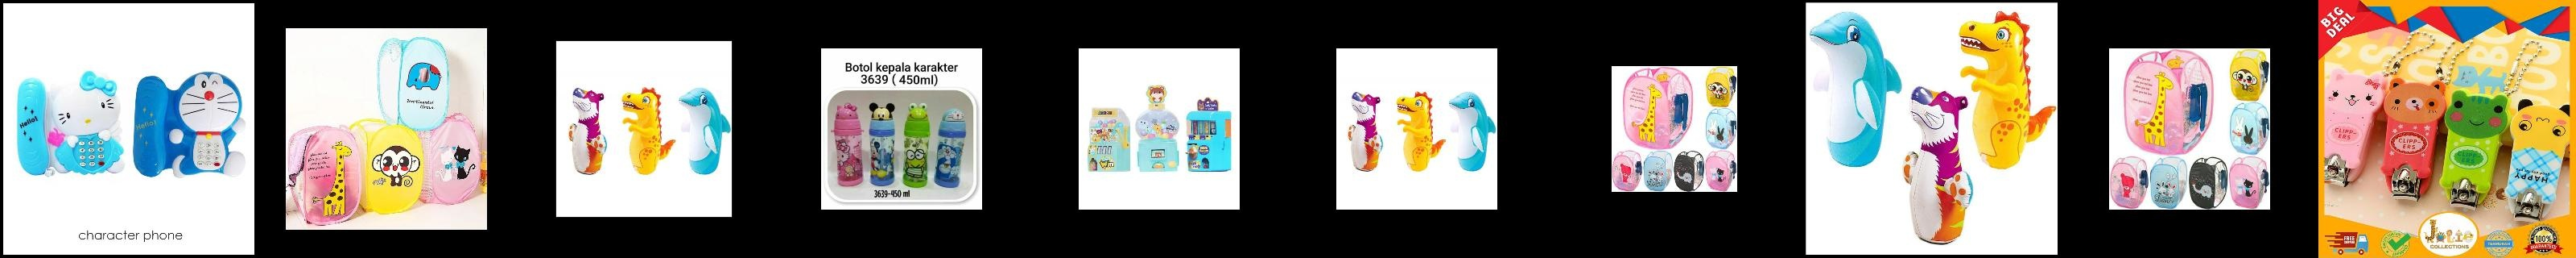

In [14]:
fastdup.create_similarity_gallery(df, work_dir, input_dir="./shopee-product-matching", min_items=3)
HTML(filename="./my-fastdup-workdir/similarity.html")

Feel free to repeat the search using other images and visualize them.

## Interactive Exploration
In addition to the static visualizations presented above, fastdup also offers interactive exploration of the dataset.

To explore the dataset and issues interactively in a browser, run:

In [ ]:
fd.explore()

> 🗒 **Note** - This currently requires you to sign-up (for free) to view the interactive exploration. Alternatively, you can visualize fastdup in a non-interactive way using fastdup's built in galleries shown in the upcoming cells.

You'll be presented with a web interface that lets you conveniently view, filter, and curate your dataset in a web interface.


![image.png](https://vl-blog.s3.us-east-2.amazonaws.com/fastdup_assets/cloud_preview.gif)

## Wrap up
Congratulations! You've made it to the end of the tutorial!

Image similarity search is an incredibly powerful tookit to have in your arsenal as a machine learning practitioner.

For example, if your model is not performing well on a particular category of images, you could use image search to find more examples of that category and add them to your training data.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 

<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/Dqw458EG/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
<br>
<div style="text-align:center; font-family:'DM Sans',sans-serif; font-style:italic; font-size:12px; max-width:600px; margin: 20px auto auto;">
    <img style="width:200px" alt="logo" src="https://d2iycffepdu1yp.cloudfront.net/design-assets/VL_horizontal_logo.png" width=300>
    <div style="margin-top:20px;">Copyright © 2024 Visual Layer. All rights reserved.</div>
</div>

</center> 